In [8]:
import numpy as np

np.random.seed(123)

In [31]:
mat1 = np.random.rand(10,5) * 2 - 1
mat1

array([[ 0.71877815,  0.64300823,  0.81974332, -0.7427376 , -0.83643983],
       [-0.72316885, -0.20124258, -0.15138628,  0.12443676, -0.7555129 ],
       [-0.597201  ,  0.6232887 , -0.06402485,  0.61587642, -0.98514724],
       [ 0.10318545,  0.8638643 ,  0.16435092, -0.58780855,  0.43551512],
       [-0.2420283 ,  0.33676789, -0.94136055,  0.27180072, -0.93560413],
       [ 0.48956131, -0.054174  , -0.75649129,  0.08527185, -0.86645111],
       [ 0.30672974,  0.99217265,  0.53879467,  0.14754823, -0.79472948],
       [ 0.39966815,  0.32233573, -0.90180574,  0.5845986 ,  0.03743318],
       [-0.14826461,  0.57637435, -0.17686155, -0.03794745, -0.63674231],
       [-0.3573622 ,  0.69106599, -0.6261925 , -0.16541788,  0.97806901]])

In [32]:
Q, R = np.linalg.qr(mat1)
print(Q.shape, R.shape)

(10, 5) (5, 5)


In [33]:
Q

array([[-0.49498362, -0.2836482 , -0.31734373, -0.24543087, -0.39459141],
       [ 0.49800726,  0.04901061, -0.04109884, -0.10214278, -0.42691168],
       [ 0.41126001, -0.37821986, -0.06742053,  0.47633208, -0.14413069],
       [-0.07105824, -0.44990873, -0.07136382, -0.4322479 ,  0.16471838],
       [ 0.1666718 , -0.19791893,  0.46182846, -0.07843174, -0.38700836],
       [-0.33713439,  0.06780322,  0.48711814, -0.06017253, -0.4171879 ],
       [-0.21122818, -0.50171103, -0.23722646,  0.44657164, -0.01469836],
       [-0.27522983, -0.13905042,  0.54916661,  0.37439918,  0.25437412],
       [ 0.10210182, -0.31750906,  0.06881911, -0.0903765 , -0.22872268],
       [ 0.24609601, -0.39502325,  0.27349495, -0.3975662 ,  0.41602972]])

In [34]:
R

array([[-1.45212512, -0.21852992, -0.4587855 ,  0.50457228,  0.07109901],
       [ 0.        , -1.88557341,  0.00394782,  0.12236292,  0.7126432 ],
       [ 0.        ,  0.        , -1.87106834,  0.63626446, -0.08955909],
       [ 0.        ,  0.        ,  0.        ,  1.04453051, -0.92172111],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.16362252]])

In [35]:
print(np.min(Q), np.max(Q))
print(np.min(mat1), np.max(mat1))

-0.5017110305414213 0.5491666059344567
-0.9851472429107739 0.9921726547356509


In [17]:
eigenvalues = np.linalg.eigvals(Q)
eigenvalues

array([ 1.        +0.j        ,  0.12165151+0.99257287j,
        0.12165151-0.99257287j, -0.99426806+0.106916j  ,
       -0.99426806-0.106916j  ])

In [18]:
np.abs(np.max(eigenvalues))

1.0000000000000009

In [20]:
W_res = np.random.rand(20, 20)
W_res[np.random.rand(*W_res.shape) > 0.8] = 0

## Scale the matrix based on user defined spectral radius.
current_spectral_radius = np.max(np.abs(np.linalg.eigvals(W_res)))
W_res = W_res * (0.8 / current_spectral_radius)

## Induce half of the weights as negative weights.
total_entries = W_res.size
num_negative_entries = total_entries//2
negative_indices = np.random.choice(total_entries, num_negative_entries, replace=False)
W_flat = W_res.flatten()
W_flat[negative_indices] *= -1
W_res = W_flat.reshape(W_res.shape)
# self.W_res, _ = np.linalg.qr(self.W_res)

In [ ]:
np.max(np.abs(np.linalg.eigvals(W_res)))

0.23663388604225918

In [ ]:
Q, _ = np.linalg.qr(W_res)
np.max(np.abs(np.linalg.eigvals(Q)))


1.0000000000000036

In [21]:
W_in = np.random.rand(100,20)
Q1, _ = np.linalg.qr(W_in)
Q1.shape

(100, 20)

In [ ]:
def func1(x):
    return np.sin(2 * np.pi * 10 * x)


points = np.linspace(1,50, 500)

# noise = np.random.randn(len(points))
aug_series1 = func1(points)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def func1(x):
    return np.sin(2 * np.pi * 10 * x)

def func2(x):
    return 2*x + 3

# Generate cosine series
points = np.linspace(1,50, 500)
aug_series1 = func1(points)
aug_series1 = aug_series1.reshape(*aug_series1.shape, 1)

print(aug_series1.shape)

W = np.random.rand(2,1)
# W, _= np.linalg.qr(W)

transformed = []
for i in range(aug_series1.shape[0]):
    transformed.append(W@aug_series1[i])

transformed = np.array(transformed)
transformed.shape


(500, 1)


(500, 2)

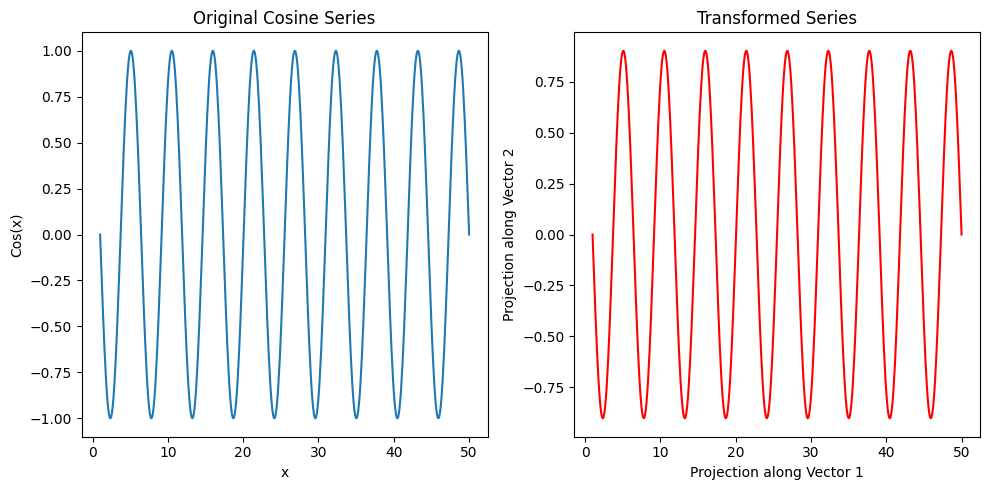

In [59]:

# Plot the original cosine series
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(points, aug_series1, label='Original Cosine Series')
plt.title('Original Cosine Series')
plt.xlabel('x')
plt.ylabel('Cos(x)')
# plt.legend()

# Plot the transformed series
plt.subplot(1, 2, 2)
plt.plot(points, transformed[:, 1], label='Transformed Series', color='red')
plt.title('Transformed Series')
plt.xlabel('Projection along Vector 1')
plt.ylabel('Projection along Vector 2')
# plt.legend()


plt.tight_layout()
plt.show()

In [7]:
abc = np.random.rand(4)
np.sqrt(np.sum(np.square(abc)))

0.7933939726577034